In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline
from scipy.stats import linregress
from sklearn import datasets

In [2]:
df = pd.read_csv("diabetes_best_data.csv")
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [3]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [4]:
for classes in "class":
    if classes == 'Postive':
        print("1")
    else:
        print("0")
        

0
0
0
0
0


In [5]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
# Convert all the 'Yes' answers to 1, and all the 'No' answers to 0;
# For 'class' (dependent variable(y)), '1' means diabetic, and '0' means not diabetic.

df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['class'] = df['class'].map({'Positive':1,'Negative':0})
df['Polyuria'] = df['Polyuria'].map({'Yes':1,'No':0})
df['Polydipsia'] = df['Polydipsia'].map({'Yes':1,'No':0})
df['sudden weight loss'] = df['sudden weight loss'].map({'Yes':1,'No':0})
df['weakness'] = df['weakness'].map({'Yes':1,'No':0})
df['Polyphagia'] = df['Polyphagia'].map({'Yes':1,'No':0})
df['Genital thrush'] = df['Genital thrush'].map({'Yes':1,'No':0})
df['visual blurring'] = df['visual blurring'].map({'Yes':1,'No':0})
df['Itching'] = df['Itching'].map({'Yes':1,'No':0})
df['Irritability'] = df['Irritability'].map({'Yes':1,'No':0})
df['delayed healing'] = df['delayed healing'].map({'Yes':1,'No':0})
df['partial paresis'] = df['partial paresis'].map({'Yes':1,'No':0})
df['muscle stiffness'] = df['muscle stiffness'].map({'Yes':1,'No':0})
df['Alopecia'] = df['Alopecia'].map({'Yes':1,'No':0})
df['Obesity'] = df['Obesity'].map({'Yes':1,'No':0})

In [7]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [8]:
df.to_csv("PPP_dataset_yes_no_converted.csv")

In [9]:

import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix

In [10]:
df.dropna(inplace=True)

In [11]:
df.reset_index()

,index,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [12]:
df.dropna()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [13]:
df.count()

Age                   520
Gender                520
Polyuria              520
Polydipsia            520
sudden weight loss    520
weakness              520
Polyphagia            520
Genital thrush        520
visual blurring       520
Itching               520
Irritability          520
delayed healing       520
partial paresis       520
muscle stiffness      520
Alopecia              520
Obesity               520
class                 520
dtype: int64

In [14]:
y = df["class"]
X = df.drop(df["class"]).values.reshape(-1, 1)
print(X.shape, y.shape)

(8806, 1) (520,)


In [15]:
# y = df[['class']]
# y.reset_index()
# y.values.reshape(-1, 1)

In [16]:
import pandas as pd

from sklearn.model_selection import train_test_split

X = X

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train


ValueError: Found input variables with inconsistent numbers of samples: [8806, 520]

In [17]:
from sklearn.datasets import make_regression

n_features = 3
X, y = make_regression(n_samples=30, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

(30, 3)


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.9999838079561164


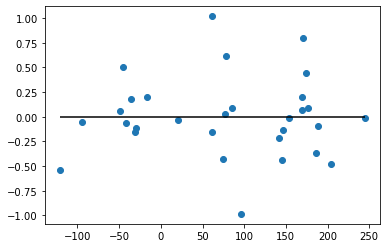

In [19]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [20]:
# array.reshape(1, -1)

NameError: name 'array' is not defined

In [21]:
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)
# array.reshape(1, -1)

NameError: name 'X_train' is not defined

In [22]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df, target, random_state=42)

NameError: name 'target' is not defined

In [23]:
# from sklearn.preprocessing import StandardScaler


In [24]:
# X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))

NameError: name 'X_train' is not defined